Proyecto - BigData

Instalacion Automatica


Instalación de las dependencias de Python

In [ ]:
pip install pandas

In [ ]:
pip install xlrd

In [ ]:
pip install matplotlib

In [ ]:
pip install findspark

In [1]:
# Biblioteca de pandas para carga inical de los datos

import pandas as pd





In [ ]:
#Carga del primer DF

¿Por que CSV? En la página del OIJ venían opciones para descargar los archivos, CSV provee una conversión mas directa a DF.

In [2]:
df_oij_read= pd.read_csv('OIJ.csv',on_bad_lines='skip')

#Borramos una columna que quedo vacia
df_oij= df_oij_read.drop(df_oij_read.columns[df_oij_read.columns.str.contains('unnamed', case=False)], axis=1)

In [3]:
df_oij.head()

,Delito,SubDelito,Fecha,Hora,Victima,SubVictima,Edad,Genero,Nacionalidad,Provincia,Canton,Distrito
0,ASALTO,ARMA BLANCA,1/10/2011,18:00:00 - 20:59:59,PERSONA,PEATON [PERSONA],Mayor de edad,HOMBRE,NICARAGUA,SAN JOSE,ALAJUELITA,SAN FELIPE
1,ASALTO,ARMA BLANCA,2/2/2011,03:00:00 - 05:59:59,PERSONA,PEATON [PERSONA],Mayor de edad,HOMBRE,COSTA RICA,CARTAGO,OREAMUNO,SAN RAFAEL
2,ASALTO,ARMA BLANCA,10/23/2011,21:00:00 - 23:59:59,PERSONA,PEATON [PERSONA],Mayor de edad,HOMBRE,COSTA RICA,HEREDIA,HEREDIA,SAN FRANCISCO
3,ASALTO,ARMA BLANCA,5/19/2011,18:00:00 - 20:59:59,PERSONA,PEATON [PERSONA],Mayor de edad,MUJER,COSTA RICA,HEREDIA,HEREDIA,HEREDIA
4,ASALTO,ARMA BLANCA,2/2/2011,03:00:00 - 05:59:59,PERSONA,PEATON [PERSONA],Mayor de edad,HOMBRE,COSTA RICA,GUANACASTE,LIBERIA,LIBERIA


Antes de cargar el segundo DF, vamos a hacer unas modificaciones en el excel
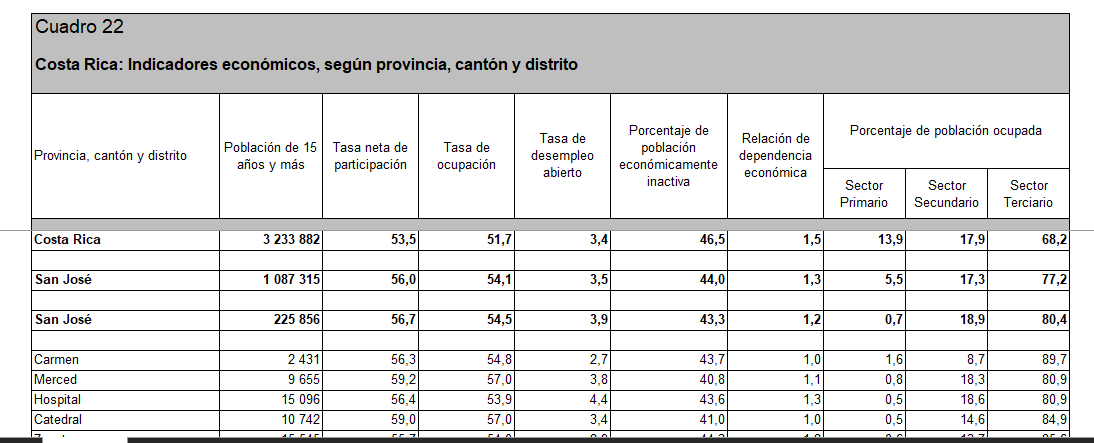

<img src="EXCEL2.png">

Este cambio lo hacemos para que sea mas facil manipularlo en Pandas, nosotros sabemos que representan esas 3 columnas, por lo cual su título no es necesario.
Alternativamente podriamos cambiar todos los titulos a
Porcentaje de población ocupada en el sector primario
Porcentaje de población ocupada en el sector secundario
Porcentaje de población ocupada en el sector terciario
Ademas de que separamos los la primer columna en provincia, canton, distrito

In [4]:
#Carga del segundo DF
df_inec_read = pd.read_excel('INEC.xls',skiprows=1)
#Nos saltamos las 5 filas de relleno del excel


#Limpieza del DF
#La mayoria de funciones en pandas devuelven un DF nuevo, el inplace true es
# para que se modifique el DF original en vez de crear uno nuevo
df_inec = df_inec_read.dropna(subset=[df_inec_read.columns[1]])

#Droppear la fila de suma de todos
df_inec = df_inec.drop(1)

#Borramos las filas que contengan NA en la columna indice 1, ya que la columna
# indice 0 tiene Na En todos sus casos.
#Seteamos los indices a las provincias en vez de numeros
#df_inec.set_index('Provincia, cantón y distrito', inplace=True)

#Borramos una columna que quedó vacia
df_inec.drop(df_inec.columns[df_inec.columns.str.contains('unnamed', case=False)], axis=1,inplace=True)


df_inec.head()

,Provincia,Canton,Distrito,Población de 15 años y más,Tasa neta de participación,Tasa de ocupación,Tasa de desempleo abierto,Porcentaje de población económicamente inactiva,Relación de dependencia económica,Sector Primario,Sector Secundario,Sector Terciario
2,San José,San José,Carmen,2431.0,56.314274,54.792267,2.702703,43.685726,0.973703,1.576577,8.708709,89.714715
3,San José,San José,Merced,9655.0,59.243915,56.996375,3.793706,40.756085,1.142832,0.835908,18.262766,80.901327
4,San José,San José,Hospital,15096.0,56.425543,53.928193,4.425922,43.574457,1.262268,0.466773,18.621791,80.911436
5,San José,San José,Catedral,10742.0,59.011357,57.028486,3.360151,40.988643,1.040700,0.457068,14.593536,84.949396
6,San José,San José,Zapote,15545.0,55.677067,54.049534,2.923166,44.322933,1.158174,0.606998,13.746727,85.646275


In [5]:
import findspark
findspark.init()

In [6]:
from pyspark.sql import SparkSession



In [7]:
#Creamos una sesión de Spark con el nombre P3 BD2
spark = SparkSession.builder.appName("P3 BD2").getOrCreate()

In [8]:
#Pasar de Pandas a Spark
df_oij_spark = spark.createDataFrame(df_oij)

C:\Spark\python\pyspark\sql\pandas\conversion.py:485: FutureWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if should_localize and is_datetime64tz_dtype(s.dtype) and s.dt.tz is not None:


In [9]:
df_inec_spark = spark.createDataFrame(df_inec)

In [10]:
df_oij_spark.show(10)

+------+-----------+----------+-------------------+-------+-------------------+-------------+------+------------+----------+-------------+-------------+
|Delito|  SubDelito|     Fecha|               Hora|Victima|         SubVictima|         Edad|Genero|Nacionalidad| Provincia|       Canton|     Distrito|
+------+-----------+----------+-------------------+-------+-------------------+-------------+------+------------+----------+-------------+-------------+
|ASALTO|ARMA BLANCA| 1/10/2011|18:00:00 - 20:59:59|PERSONA|   PEATON [PERSONA]|Mayor de edad|HOMBRE|   NICARAGUA|  SAN JOSE|   ALAJUELITA|   SAN FELIPE|
|ASALTO|ARMA BLANCA|  2/2/2011|03:00:00 - 05:59:59|PERSONA|   PEATON [PERSONA]|Mayor de edad|HOMBRE|  COSTA RICA|   CARTAGO|     OREAMUNO|   SAN RAFAEL|
|ASALTO|ARMA BLANCA|10/23/2011|21:00:00 - 23:59:59|PERSONA|   PEATON [PERSONA]|Mayor de edad|HOMBRE|  COSTA RICA|   HEREDIA|      HEREDIA|SAN FRANCISCO|
|ASALTO|ARMA BLANCA| 5/19/2011|18:00:00 - 20:59:59|PERSONA|   PEATON [PERSONA]|May

In [11]:
df_inec_spark.show(10)

+---------+--------+--------------------+--------------------------+--------------------------+------------------+-------------------------+-----------------------------------------------+---------------------------------+-------------------+------------------+-----------------+
|Provincia|  Canton|            Distrito|Población de 15 años y más|Tasa neta de participación| Tasa de ocupación|Tasa de desempleo abierto|Porcentaje de población económicamente inactiva|Relación de dependencia económica|    Sector Primario| Sector Secundario| Sector Terciario|
+---------+--------+--------------------+--------------------------+--------------------------+------------------+-------------------------+-----------------------------------------------+---------------------------------+-------------------+------------------+-----------------+
| San José|San José|   Carmen           |                    2431.0|         56.31427396133278|54.792266556972436|       2.7027027027027026|                    

In [12]:
from pyspark.sql.functions import lower
#Función que obtiene un dataframa y pasa todo lo de una columna a minuscula
#Parametros: 
# dataframe: El frame de Spark a editar, nombreColumna el nombre de la columna que se quiere modificar.
#Return : El dataframe modificado.
def columna_a_minusculas(dataframe, nombreColumna):
  dataframe=dataframe.withColumn(nombreColumna,lower(dataframe[nombreColumna]))
  return dataframe

In [13]:
from pyspark.sql.functions import regexp_replace
#Función que obtiene un dataframa y quita los espacios de la columna enviada como parametro.
#Parametros: 
# dataframe: El frame de Spark a editar, nombreColumna el nombre de la columna que se quiere modificar.
#return : El dataframe modificado
def columna_sin_espacios(dataframe, nombreColumna):
    dataframe = dataframe.withColumn(nombreColumna, regexp_replace(dataframe[nombreColumna], " ", ""))
    return dataframe

In [17]:
from pyspark.sql.functions import col, regexp_replace
#Función que obtiene un dataframa y quita los tildes de la columna enviada como parametro.
#Parametros: 
# dataframe: El frame de Spark a editar, nombreColumna el nombre de la columna que se quiere modificar.
#return : El dataframe modificado

def quitar_tildes(dataframe, nombreColumna):
    caracteres_con_tilde = ["á", "é", "í", "ó", "ú", "ü"]
    caracteres_sin_tilde = ["a", "e", "i", "o", "u", "u"]
    expr = col(nombreColumna)
    for c_tilde, c_sin_tilde in zip(caracteres_con_tilde, caracteres_sin_tilde):
        expr = regexp_replace(expr, c_tilde, c_sin_tilde)


    dataframe_sin_tildes = dataframe.withColumn(nombreColumna, expr)


    return dataframe_sin_tildes

In [18]:
#Función que obtiene 2 dataframe y realiza un conteo de los registros los cuales no tienen coincidencia entre los 2 dataframe
#Parametros: 
# df_1: El primer dataframe
# df_2: El segundo dataframe
#return : El conteo de los distritos sin coincidencia
def contar_distritos_sin_coincidencia(df_1, df_2):
    distritos_df_1 = df_1.select('Distrito')
    distritos_df_2 = df_2.select('Distrito')


    distritos_no_coincidentes = distritos_df_1.subtract(distritos_df_2)


    cantidad_distritos_no_coincidentes = distritos_no_coincidentes.count()
    return cantidad_distritos_no_coincidentes

In [19]:
from pyspark.sql.functions import col
#Función que obtiene 2 dataframe y devuevle de los registros los cuales no tienen coincidencia entre los 2 dataframe
#Parametros: 
# df_1: El primer dataframe
# df_2: El segundo dataframe
#return : La lista de los distritos sin coincidencia

def obtener_distritos_sin_coincidencia(df_1, df_2):
    distritos_df_1 = df_1.select('Distrito')
    distritos_df_2 = df_2.select('Distrito')


    distritos_no_coincidentes = distritos_df_1.subtract(distritos_df_2)


    distritos_no_coincidentes_list = [row.Distrito for row in distritos_no_coincidentes.collect()]
    return distritos_no_coincidentes_list

In [20]:
from pyspark.sql.functions import concat_ws
df_oij_spark_corrected =columna_a_minusculas(df_oij_spark,'Distrito')
df_oij_spark_corrected= columna_sin_espacios(df_oij_spark_corrected,'Distrito')
df_oij_spark_corrected= quitar_tildes(df_oij_spark_corrected,'Distrito')
df_oij_spark_corrected= quitar_tildes(df_oij_spark_corrected,'Canton')
df_oij_spark_corrected= columna_sin_espacios(df_oij_spark_corrected,'Canton')
df_oij_spark_corrected =columna_a_minusculas(df_oij_spark_corrected,'Canton')

df_oij_spark_corrected.show(5)

+------+-----------+----------+-------------------+-------+----------------+-------------+------+------------+----------+----------+------------+
|Delito|  SubDelito|     Fecha|               Hora|Victima|      SubVictima|         Edad|Genero|Nacionalidad| Provincia|    Canton|    Distrito|
+------+-----------+----------+-------------------+-------+----------------+-------------+------+------------+----------+----------+------------+
|ASALTO|ARMA BLANCA| 1/10/2011|18:00:00 - 20:59:59|PERSONA|PEATON [PERSONA]|Mayor de edad|HOMBRE|   NICARAGUA|  SAN JOSE|alajuelita|   sanfelipe|
|ASALTO|ARMA BLANCA|  2/2/2011|03:00:00 - 05:59:59|PERSONA|PEATON [PERSONA]|Mayor de edad|HOMBRE|  COSTA RICA|   CARTAGO|  oreamuno|   sanrafael|
|ASALTO|ARMA BLANCA|10/23/2011|21:00:00 - 23:59:59|PERSONA|PEATON [PERSONA]|Mayor de edad|HOMBRE|  COSTA RICA|   HEREDIA|   heredia|sanfrancisco|
|ASALTO|ARMA BLANCA| 5/19/2011|18:00:00 - 20:59:59|PERSONA|PEATON [PERSONA]|Mayor de edad| MUJER|  COSTA RICA|   HEREDIA|   

In [21]:
df_inec_spark_corrected =columna_a_minusculas(df_inec_spark,'Distrito')
df_inec_spark_corrected= columna_sin_espacios(df_inec_spark_corrected,'Distrito')
df_inec_spark_corrected= columna_sin_espacios(df_inec_spark_corrected,'Canton')
df_inec_spark_corrected= quitar_tildes(df_inec_spark_corrected,'Distrito')
df_inec_spark_corrected= quitar_tildes(df_inec_spark_corrected,'Canton')
df_inec_spark_corrected =columna_a_minusculas(df_inec_spark_corrected,'Canton')

df_inec_spark_corrected.show(5)

+---------+-------+--------+--------------------------+--------------------------+------------------+-------------------------+-----------------------------------------------+---------------------------------+-------------------+------------------+-----------------+
|Provincia| Canton|Distrito|Población de 15 años y más|Tasa neta de participación| Tasa de ocupación|Tasa de desempleo abierto|Porcentaje de población económicamente inactiva|Relación de dependencia económica|    Sector Primario| Sector Secundario| Sector Terciario|
+---------+-------+--------+--------------------------+--------------------------+------------------+-------------------------+-----------------------------------------------+---------------------------------+-------------------+------------------+-----------------+
| San José|sanjose|  carmen|                    2431.0|         56.31427396133278|54.792266556972436|       2.7027027027027026|                              43.68572603866722|               0.9737034

In [22]:
contar_distritos_sin_coincidencia(df_inec_spark_corrected,df_oij_spark_corrected)

41

In [23]:
obtener_distritos_sin_coincidencia(df_inec_spark_corrected,df_oij_spark_corrected)

['lapalmera',
 'porvenir',
 'puertocortes',
 'puertojimenez',
 'cañas',
 'lagranja',
 'guadalupeoarenilla',
 'zapotal',
 'elgeneral',
 'porozal',
 'laasuncion',
 'nan',
 'aguacalienteosanfrancisco',
 'tapesco',
 'latigra',
 'juanviñas',
 'palmitos',
 'lafortuna',
 'arancibia',
 'huacas',
 'garita',
 'launion',
 'cañonegro',
 'lashorquetas',
 'laceiba',
 'elcairo',
 'sanjoseopizote',
 'sanjosedelamontaña',
 'legua',
 'peñasblancas',
 'macacona',
 'chirripo',
 'rincondesabanilla',
 'rionaranjo',
 'elrosario',
 'sarapiqui',
 'colinas',
 'cañasdulces',
 'matadeplatano',
 'elmastate',
 'cureña']

In [24]:
#Basado en los resultados anteriores se hicieron las modificaciones
from pyspark.sql.functions import col,when
df_inec_spark_corrected = df_inec_spark_corrected.withColumn("Distrito2",when(col("Distrito")=='lapalmera','palmera')\
    .when(col("Distrito")=='laasuncion','asuncion')\
       .when(col("Distrito")=='latigra','tigra')\
           .when(col("Distrito")=='canas','cañas')\
               .when(col("Distrito")=='lagranja','granja')\
                   .when(col("Distrito")=='elgeneral','general')\
                       .when(col("Distrito")=='tapesco','tapezco')\
                           .when(col("Distrito")=='juanviñas','juanvinas')\
                               .when(col("Distrito")=='lafortuna','fortuna')\
                                   .when(col("Distrito")=='cañonegro','canonegro')\
                                       .when(col("Distrito")=='cañasdulces','canasdulces')
                                       \
                                           .otherwise(col("Distrito")))

df_inec_spark_corrected.show(5)

+---------+-------+--------+--------------------------+--------------------------+------------------+-------------------------+-----------------------------------------------+---------------------------------+-------------------+------------------+-----------------+---------+
|Provincia| Canton|Distrito|Población de 15 años y más|Tasa neta de participación| Tasa de ocupación|Tasa de desempleo abierto|Porcentaje de población económicamente inactiva|Relación de dependencia económica|    Sector Primario| Sector Secundario| Sector Terciario|Distrito2|
+---------+-------+--------+--------------------------+--------------------------+------------------+-------------------------+-----------------------------------------------+---------------------------------+-------------------+------------------+-----------------+---------+
| San José|sanjose|  carmen|                    2431.0|         56.31427396133278|54.792266556972436|       2.7027027027027026|                              43.685726038

In [25]:
#Juntar canton y distrito
df_oij_spark_corrected= df_oij_spark_corrected.withColumn("CantonYDistrito", concat_ws("-","Distrito","Canton"))
df_inec_spark_corrected= df_inec_spark_corrected.withColumn("CantonYDistrito", concat_ws("-","Distrito","Canton"))

In [26]:
PSQL_SERVERNAME="localhost"
PSQL_PORTNUMBER=5432

POSTGRESQL_URL = "jdbc:postgresql://localhost/P3BD2"
POSTGRESQL_USER = "postgres"
POSTGRESQL_PASSWORD = "pass"

In [27]:
#Función que escribe un dataframe en una base de datos
#Parametros:
#spark_df: El dataframe el cual queremos escribir
#table_name: El nombre de la tabla que quedará escrita en la base de datos
def write_spark_df_to_db(spark_df, table_name):
    """
    This function writes Spark dataframe to DB
    """
    spark_df \
        .write \
        .format("jdbc") \
        .mode('overwrite') \
        .option("url", POSTGRESQL_URL) \
        .option("user", POSTGRESQL_USER) \
        .option("password", POSTGRESQL_PASSWORD) \
        .option("dbtable", table_name) \
        .save()



Graficación y Joins


In [28]:
import matplotlib.pyplot as plt

1. Compare la cantidad de delitos y la tasa de ocupación para los 10 distritos con más
delitos en el país.


In [29]:
#Creamos una tabla temporal con el DF
df_oij_spark_corrected.createOrReplaceTempView("OIJ")

In [30]:
#Por medio de este query obtenemos el conteo de distritos y delitos
totalDelitos =spark.sql("SELECT CantonYDistrito as CantonYDistritoOIJ, COUNT(*) as TotalDelitos FROM OIJ GROUP BY CantonYDistrito")
totalDelitos.show()

+--------------------+------------+
|  CantonYDistritoOIJ|TotalDelitos|
+--------------------+------------+
|      carmen-sanjose|         570|
|     guapiles-pococi|         782|
|        batan-matina|         152|
|    barrantes-flores|          10|
|   florida-siquirres|          24|
|    telire-talamanca|           5|
|rosario-desamparados|          13|
|      sanroque-barva|          24|
|       escazu-escazu|         211|
|llanosdesantaluci...|          53|
|     duacari-guacimo|          25|
|    catedral-sanjose|        1073|
|   pocosol-sancarlos|          77|
|    angeles-sanramon|          42|
|     diria-santacruz|          11|
|sanfranciscodedos...|         393|
|    guaycara-golfito|         104|
|  latrinidad-moravia|          69|
|   tarcoles-garabito|         139|
|     sanroque-grecia|          43|
+--------------------+------------+
only showing top 20 rows



In [31]:
#Hacemos el join con el DF del inec
df__ejercicio_1 = df_inec_spark_corrected.join(totalDelitos,df_inec_spark_corrected['CantonYDistrito']==totalDelitos["CantonYDistritoOIJ"],'inner')
df__ejercicio_1.show()

+----------+------------+--------------------+--------------------------+--------------------------+------------------+-------------------------+-----------------------------------------------+---------------------------------+-------------------+------------------+------------------+--------------------+--------------------+--------------------+------------+
| Provincia|      Canton|            Distrito|Población de 15 años y más|Tasa neta de participación| Tasa de ocupación|Tasa de desempleo abierto|Porcentaje de población económicamente inactiva|Relación de dependencia económica|    Sector Primario| Sector Secundario|  Sector Terciario|           Distrito2|     CantonYDistrito|  CantonYDistritoOIJ|TotalDelitos|
+----------+------------+--------------------+--------------------------+--------------------------+------------------+-------------------------+-----------------------------------------------+---------------------------------+-------------------+------------------+----------

In [32]:
#Creamos una table temporal para este nuevo df
df__ejercicio_1.createOrReplaceTempView("Cantidad_Delitos")


In [33]:
#Obtenemos los 10 mayores
df__ejercicio_1_top10= spark.sql("Select * from Cantidad_Delitos ORDER BY TotalDelitos DESC LIMIT 10")

In [34]:
df__ejercicio_1_top10.show()

+----------+------------+--------------------+--------------------------+--------------------------+------------------+-------------------------+-----------------------------------------------+---------------------------------+-------------------+------------------+-----------------+--------------------+--------------------+--------------------+------------+
| Provincia|      Canton|            Distrito|Población de 15 años y más|Tasa neta de participación| Tasa de ocupación|Tasa de desempleo abierto|Porcentaje de población económicamente inactiva|Relación de dependencia económica|    Sector Primario| Sector Secundario| Sector Terciario|           Distrito2|     CantonYDistrito|  CantonYDistritoOIJ|TotalDelitos|
+----------+------------+--------------------+--------------------------+--------------------------+------------------+-------------------------+-----------------------------------------------+---------------------------------+-------------------+------------------+------------

In [35]:
#Convertimos el df a Pandas para graficarlos
df__ejercicio_1_pandas= df__ejercicio_1_top10.toPandas()



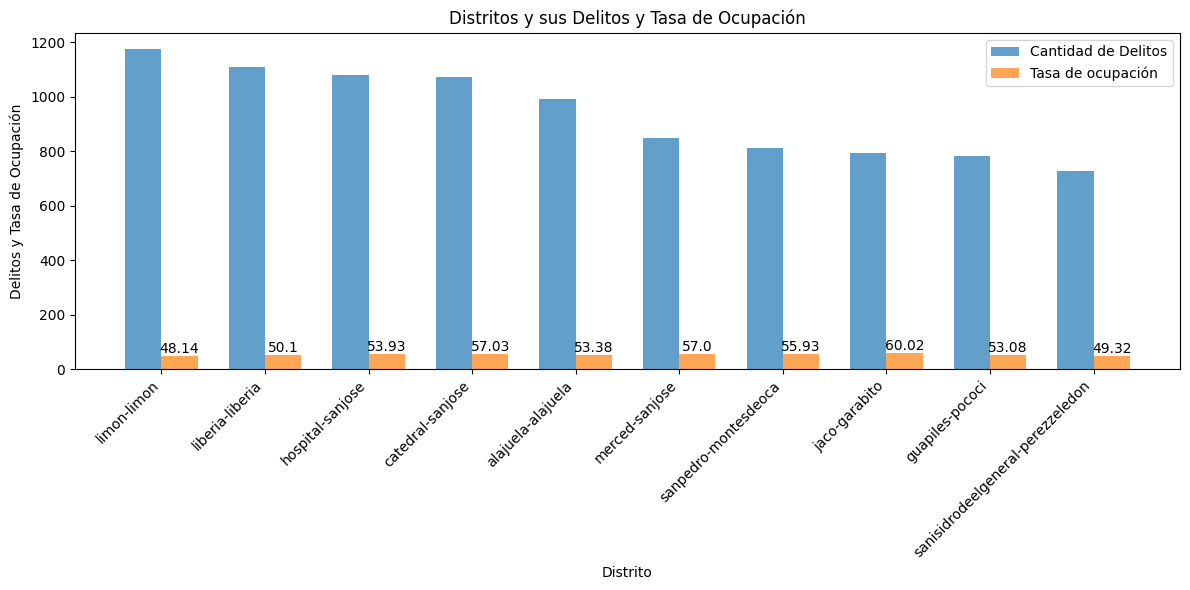

In [36]:
import matplotlib.pyplot as plt
import numpy as np

#Seteamos los indices
x_indices = np.arange(len(df__ejercicio_1_pandas['CantonYDistrito']))

bar_width = 0.35

#Creamos las 2 barras
plt.figure(figsize=(12, 6))
bar1 = plt.bar(x_indices, df__ejercicio_1_pandas["TotalDelitos"], width=bar_width, label="Cantidad de Delitos", align='center', alpha=0.7)
bar2 = plt.bar(x_indices + bar_width, df__ejercicio_1_pandas["Tasa de ocupación"], width=bar_width, label="Tasa de ocupación", align='center', alpha=0.7)

#Colocamos la tase de ocupación encima de las barras para que se vean mas fácil.
for i, value in enumerate(df__ejercicio_1_pandas["Tasa de ocupación"]):
    plt.text(i + bar_width, value + 0.02, str(round(value, 2)), ha='center', va='bottom')

#Escribimos los nombres en el eje X, con una rotación debido a que los nombres son muy largos.
plt.xticks(x_indices + bar_width / 2, df__ejercicio_1_pandas['CantonYDistrito'], rotation=45, ha="right")


plt.xlabel("Distrito")
plt.ylabel("Delitos y Tasa de Ocupación")
plt.title("Distritos y sus Delitos y Tasa de Ocupación")
plt.legend()


plt.tight_layout()

plt.show()


2. Grafique la cantidad de delitos por día de la semana para el distrito con más delitos.

In [37]:
df_ejercicio_2=df_oij_spark

In [38]:
df_ejercicio_2=df_oij_spark_corrected.toPandas()

In [39]:
#Convertimos la fecha en un Datedatime
df_ejercicio_2["Fecha"]= pd.to_datetime(df_ejercicio_2["Fecha"],format='%m/%d/%Y')

In [40]:
#Con pandas obtenemos el dia de la semana
df_ejercicio_2['DiaSemana']=df_ejercicio_2['Fecha'].dt.day_name()
df_ejercicio_2.head()

,Delito,SubDelito,Fecha,Hora,Victima,SubVictima,Edad,Genero,Nacionalidad,Provincia,Canton,Distrito,CantonYDistrito,DiaSemana
0,ASALTO,ARMA BLANCA,2011-01-10,18:00:00 - 20:59:59,PERSONA,PEATON [PERSONA],Mayor de edad,HOMBRE,NICARAGUA,SAN JOSE,alajuelita,sanfelipe,sanfelipe-alajuelita,Monday
1,ASALTO,ARMA BLANCA,2011-02-02,03:00:00 - 05:59:59,PERSONA,PEATON [PERSONA],Mayor de edad,HOMBRE,COSTA RICA,CARTAGO,oreamuno,sanrafael,sanrafael-oreamuno,Wednesday
2,ASALTO,ARMA BLANCA,2011-10-23,21:00:00 - 23:59:59,PERSONA,PEATON [PERSONA],Mayor de edad,HOMBRE,COSTA RICA,HEREDIA,heredia,sanfrancisco,sanfrancisco-heredia,Sunday
3,ASALTO,ARMA BLANCA,2011-05-19,18:00:00 - 20:59:59,PERSONA,PEATON [PERSONA],Mayor de edad,MUJER,COSTA RICA,HEREDIA,heredia,heredia,heredia-heredia,Thursday
4,ASALTO,ARMA BLANCA,2011-02-02,03:00:00 - 05:59:59,PERSONA,PEATON [PERSONA],Mayor de edad,HOMBRE,COSTA RICA,GUANACASTE,liberia,liberia,liberia-liberia,Wednesday


In [41]:
#Hacemos un agrupamiento con pandas
df_ejercicio_2_sumado = df_ejercicio_2.groupby(["CantonYDistrito","DiaSemana"]).size().reset_index(name="CantidadDelitos")
df_ejercicio_2_sumado.head(10)

,CantonYDistrito,DiaSemana,CantidadDelitos
0,acapulco-puntarenas,Friday,2
1,acapulco-puntarenas,Tuesday,1
2,aguabuena-cotobrus,Friday,1
3,aguabuena-cotobrus,Monday,2
4,aguabuena-cotobrus,Saturday,3
5,aguabuena-cotobrus,Sunday,3
6,aguabuena-cotobrus,Thursday,3
7,aguabuena-cotobrus,Tuesday,3
8,aguabuena-cotobrus,Wednesday,4
9,aguasclaras-upala,Friday,5


In [42]:
#Distrito con mas delitos
distrito = df__ejercicio_1_pandas.iloc[0]
#Filtrar el df
df_ejercicio_2_por_distrito= df_ejercicio_2_sumado[df_ejercicio_2_sumado["CantonYDistrito"]==distrito["CantonYDistrito"]]
print(df_ejercicio_2_por_distrito)

     CantonYDistrito  DiaSemana  CantidadDelitos
1146     limon-limon     Friday              192
1147     limon-limon     Monday              174
1148     limon-limon   Saturday              166
1149     limon-limon     Sunday              122
1150     limon-limon   Thursday              171
1151     limon-limon    Tuesday              153
1152     limon-limon  Wednesday              198


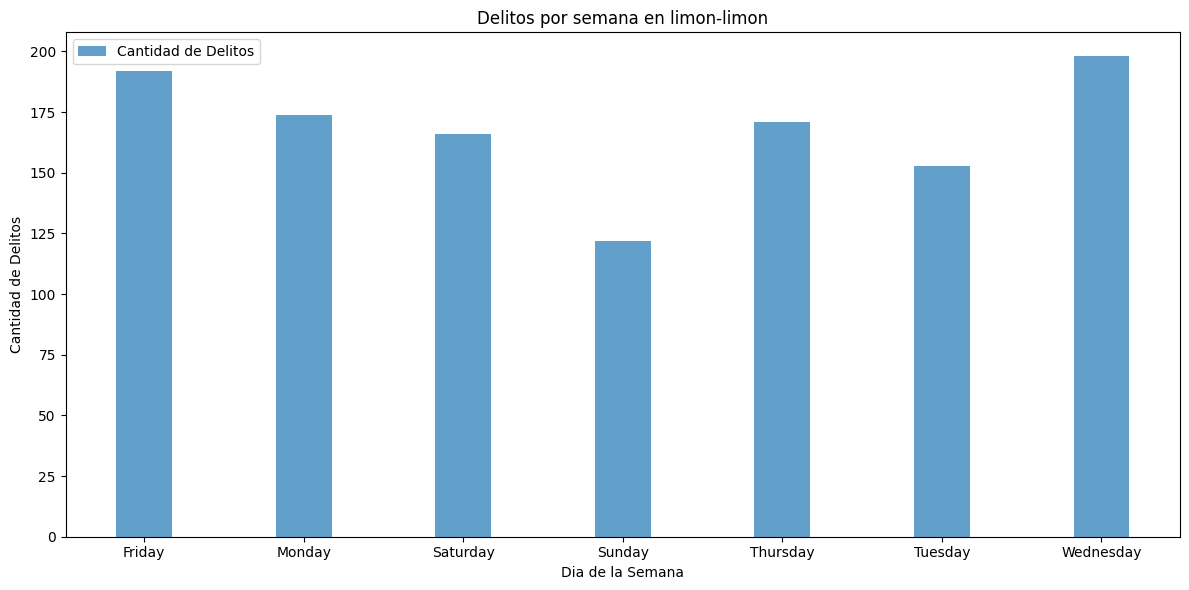

In [43]:
import matplotlib.pyplot as plt
import numpy as np


x_indices = np.arange(len(df_ejercicio_2_por_distrito['DiaSemana']))

bar_width = 0.35


plt.figure(figsize=(12, 6))
bar1 = plt.bar(x_indices, df_ejercicio_2_por_distrito["CantidadDelitos"], width=bar_width, label="Cantidad de Delitos", align='center', alpha=0.7)

plt.xticks(x_indices, df_ejercicio_2_por_distrito['DiaSemana'])




plt.xlabel("Dia de la Semana")
plt.ylabel("Cantidad de Delitos")
plt.title("Delitos por semana en " +df_ejercicio_2_por_distrito.iloc[0]["CantonYDistrito"] )
plt.legend()


plt.tight_layout()

plt.show()

3. Grafique la cantidad de delitos por tipo y por distrito. Es decir, para el distrito

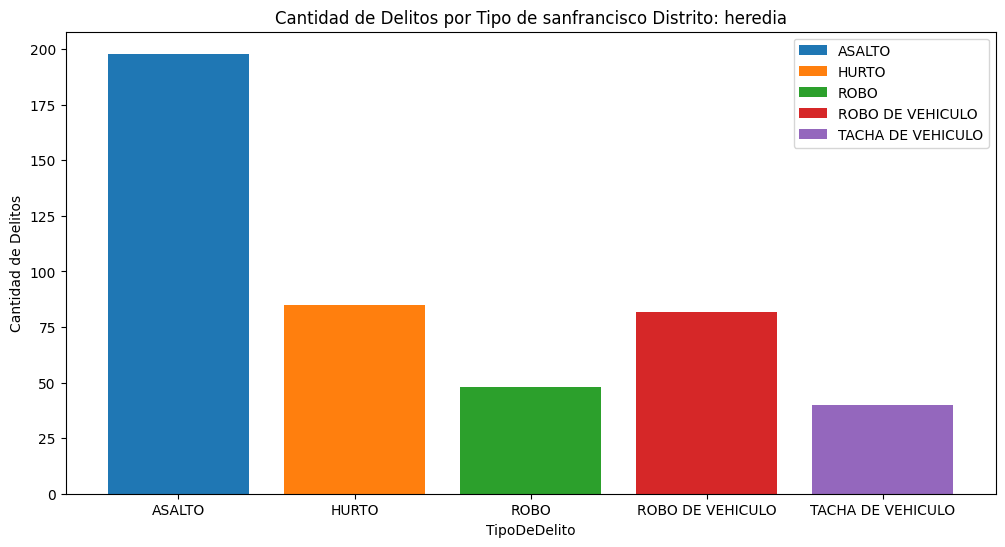

In [44]:
#Aqui se puede selecccionar el distrito y el canton que se desea graficar
CantonConsulta3 = "sanfrancisco"
DistritoConsulta3 = "heredia"

TipoDelitosDistrito =spark.sql("SELECT CantonYDistrito, Delito AS TipoDeDelito, COUNT(*) AS CantidadDeDelitos FROM OIJ where CantonYDistrito = '"+CantonConsulta3+"-"+DistritoConsulta3+"' GROUP BY CantonYDistrito, Delito ORDER BY CantonYDistrito,Delito")


TipoDelitosDistrito_Pandas = TipoDelitosDistrito.toPandas()

plt.figure(figsize=(12, 6))
for tipo_delito, group in TipoDelitosDistrito_Pandas.groupby('TipoDeDelito'):
    plt.bar(group['TipoDeDelito'], group['CantidadDeDelitos'], label=tipo_delito)

plt.xlabel('TipoDeDelito')
plt.ylabel('Cantidad de Delitos')
plt.title("Cantidad de Delitos por Tipo de " + CantonConsulta3 +" Distrito: "+ DistritoConsulta3)
plt.legend()
plt.show()

    4. Grafique la cantidad de delitos por sexo para todo el conjunto de datos.

Para esto necesitamos:

    a) mostrar la cantidad de delitos cometidos por cada sexo

In [45]:
df_oij_graph = df_oij_spark
df_oij_graph5 = df_oij_graph
df_oij_graph5 = df_oij_graph.groupBy("Genero").count()

In [46]:
graph6 = df_oij_graph5.toPandas()

colors = plt.cm.Paired(range(len(graph6)))

<BarContainer object of 3 artists>

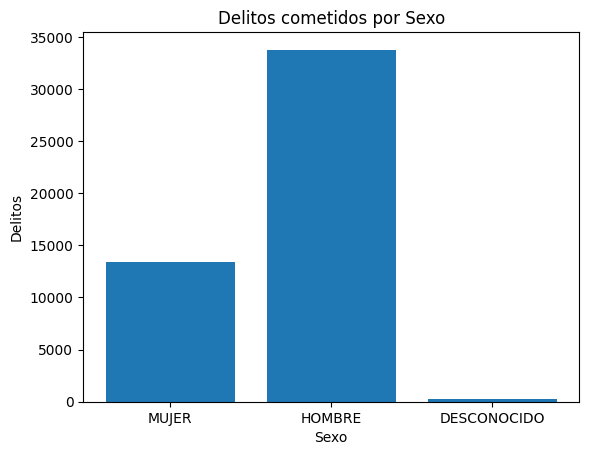

In [47]:
plt.title("Delitos cometidos por Sexo")
plt.xlabel("Sexo")
plt.ylabel("Delitos")
plt.bar(graph6["Genero"],graph6["count"])

    5. Proponga una visualización de su interés.

Para esto necesitamos:

    a) Obtener los 10 distritos con mayores delitos
    
    b) Obtener la relación de dependencia para esos distritos


In [48]:
graph7 = df__ejercicio_1_pandas

colors = plt.cm.Paired(range(len(graph7)))

In [49]:
graph7.head()
graph7.dtypes
graph7['Tasa de desempleo abierto'] = graph7['Tasa de desempleo abierto'].astype(float)


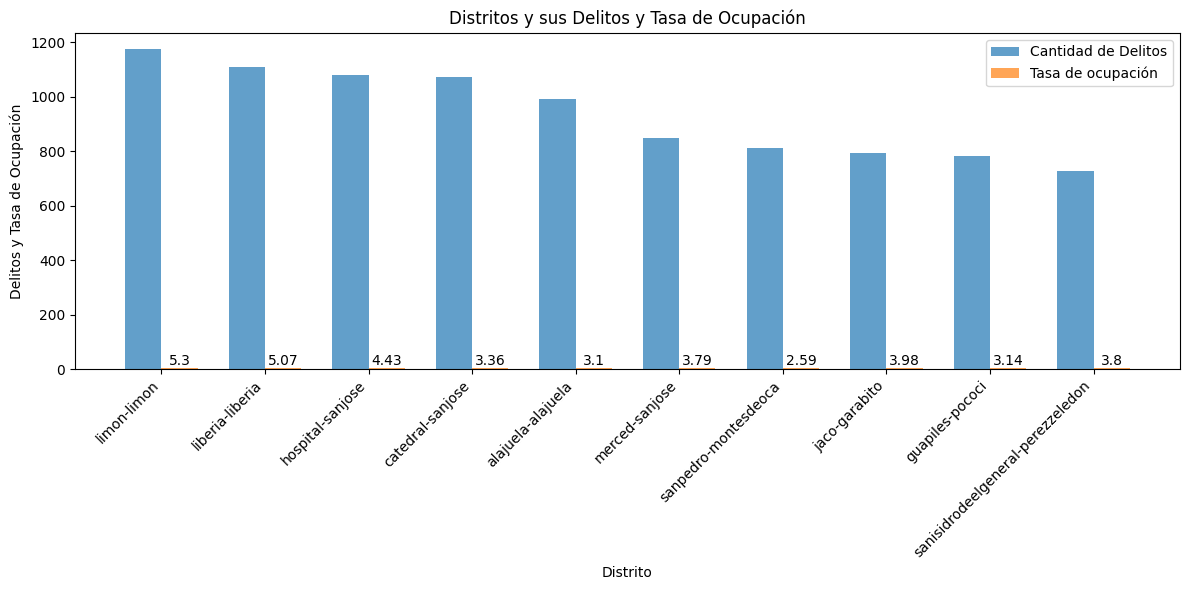

In [50]:
import matplotlib.pyplot as plt
import numpy as np


x_indices = np.arange(len(df__ejercicio_1_pandas['CantonYDistrito']))

bar_width = 0.35


plt.figure(figsize=(12, 6))
bar1 = plt.bar(x_indices, df__ejercicio_1_pandas["TotalDelitos"], width=bar_width, label="Cantidad de Delitos", align='center', alpha=0.7)
bar2 = plt.bar(x_indices + bar_width, df__ejercicio_1_pandas["Tasa de desempleo abierto"], width=bar_width, label="Tasa de ocupación", align='center', alpha=0.7)


for i, value in enumerate(df__ejercicio_1_pandas["Tasa de desempleo abierto"]):
    plt.text(i + bar_width, value + 0.02, str(round(value, 2)), ha='center', va='bottom')


plt.xticks(x_indices + bar_width / 2, df__ejercicio_1_pandas['CantonYDistrito'], rotation=45, ha="right")


plt.xlabel("Distrito")
plt.ylabel("Delitos y Tasa de Ocupación")
plt.title("Distritos y sus Delitos y Tasa de Ocupación")
plt.legend()


plt.tight_layout()

plt.show()

Guardar los datos en limpio

In [52]:
write_spark_df_to_db(df_oij_spark, "OIJ_Estadisticas")

In [53]:
write_spark_df_to_db(df_inec_spark, "Censo_Inec")

Fuentes:
Instalación de Pyspark en Google Collabs

https://medium.com/grabngoinfo/install-pyspark-3-on-google-colab-the-easy-way-577ec4a2bcd8

Joins SQL:
https://medium.com/plumbersofdatascience/exploring-the-different-join-types-in-spark-sql-a-step-by-step-guide-49342ffe9578


Instalar Pyspark en Windows
https://www.youtube.com/watch?v=wt2wM8C2SXA&list=PLYFBiuYObvKB_k0bnkI41biMjD12t44GN&index=1